In [1]:
from coreLib.dataset import DataSet
data_dir       = "/home/rezwanul/Desktop/Apsis_Bangla_Handwritten/synth_DataSet/sourcedata/"
ds=DataSet(data_dir)

#LOG     :All paths found


  0%|          | 3575/1059977 [00:00<00:29, 35748.84it/s]

#LOG     :Processing Dictionary:/home/rezwanul/Desktop/Apsis_Bangla_Handwritten/synth_DataSet/sourcedata/bangla/dictionary.csv


100%|██████████| 10305/10305 [00:00<00:00, 989566.89it/s]


#LOG     :converting int labels to string


  1%|▏         | 4636/370098 [00:00<00:07, 46353.63it/s]

#LOG     :Processing Dictionary:/home/rezwanul/Desktop/Apsis_Bangla_Handwritten/synth_DataSet/sourcedata/english/dictionary.csv


100%|██████████| 5975/5975 [00:00<00:00, 301862.98it/s]


#LOG     :bangla.graphemes


100%|██████████| 200840/200840 [00:00<00:00, 4111015.21it/s]


#LOG     :bangla.numbers


100%|██████████| 72045/72045 [00:00<00:00, 4482231.95it/s]


#LOG     :english.graphemes


100%|██████████| 10305/10305 [00:00<00:00, 3506311.57it/s]


#LOG     :english.numbers
#LOG     :common.symbols


100%|██████████| 2682/2682 [00:00<00:00, 4273983.03it/s]


#LOG     :bangla.fonts
#LOG     :english.fonts
#LOG     :common.background


100%|██████████| 982/982 [00:00<00:00, 819826.14it/s]


#LOG     :common.noise.random


100%|██████████| 3240/3240 [00:00<00:00, 951782.11it/s]

#LOG     :common.noise.sign


### Import necessary Libraries and create full memo image

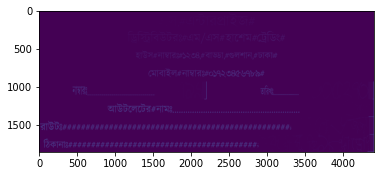

(1856, 4418)


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 

# memo head libraries
from memoLib.head import memoHeadFunc, placeHandTextOnMemoHeadImage

head_names=[
               "এ.স. এন্টারপ্রাইজ",
               "ড্রিস্ট্রিবিউটরঃ এম/এস হাশেম ট্রেডিং",
               "হাউস নাম্বারঃ ১২৩৪, বাড্ডা, গুলশান, ঢাকা।",    
               "মোবাইল নাম্বারঃ ০১৭২৩৪৫৬৭৮৯",
               "নাম্বারঃ",
               "তারিখঃ"
               ] 

head_var_names=[
                
               "আউটলেটের নামঃ",
               "রাউটঃ",
               "ঠিকানাঃ"
                
                ]


### Call Function: memoHeadFunc()
memoHead_img, _lst, _lst_dn = memoHeadFunc(ds,head_names,head_var_names)

### Call Function: placeHandTextOnMemoHeadImage()
full_memoHead_img = placeHandTextOnMemoHeadImage(ds, memoHead_img, _lst, _lst_dn)
plt.imshow(full_memoHead_img)
plt.show()

print(full_memoHead_img.shape)

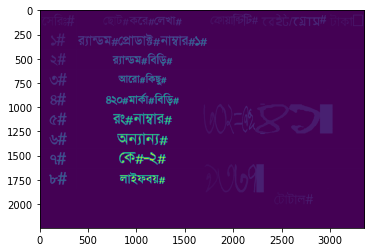

(2246, 3347)


In [3]:
# memo table library
from memoLib.table import placeHandwrittenTextOnTableImg

printTextData = {'serial': ["সেরিঃ",  
                            "১",
                            "২",
                            "৩", 
                            "৪", 
                            "৫",
                            "৬",
                            "৭",
                            "৮"],
                 'brand': ["ছোট করে লেখা", 
                            "র‍্যান্ডম প্রোডাক্ট নাম্বার ১",
                            "র‍্যান্ডম বিড়ি",
                            "আরো কিছু",
                            "৪২০ মার্কা বিড়ি",
                            "রং নাম্বার",
                            "অন্যান্য",
                            "কে-২",
                            "লাইফবয়"],
                 'quantity': ["কোয়ান্টিটি"],
                 'rate': ["রেইট/গ্রোস"], 
                 'taka': ["টাকা"]
                } 

total = ["টোটাল"]

### Call Function: placeHandwrittenTextOnTableImg()
full_memoTable_img = placeHandwrittenTextOnTableImg(ds, printTextData, total)
plt.imshow(full_memoTable_img)
plt.show()

print(full_memoTable_img.shape)

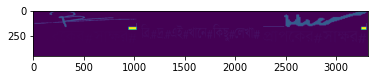

(448, 3316)


In [4]:
# memo bottom libraries
from memoLib.bottom import memoBottomFunc, placeSignsOnMemoBottomImage


bottom_names_snd_rcv = [
                "প্রেরকের সাক্ষর", 
                "প্রাপকের সাক্ষর"
                
                ]

bottom_names_mdl = ["ব্রি. দ্র. এই খানে কিছু লেখা।"]

### Call Function: memoBottomFunc()
bottom_img, sr_iden_list = memoBottomFunc(ds, bottom_names_snd_rcv, bottom_names_mdl)

### Call Function: placeSignsOnMemoBottomImage()
full_memoBottom_img = placeSignsOnMemoBottomImage(ds, bottom_img, sr_iden_list)
plt.imshow(full_memoBottom_img)
plt.show()

print(full_memoBottom_img.shape)


In [5]:
## resize full_memoHead_img, full_memoTable_img, full_memoBottom_img
width_memo = max(full_memoHead_img.shape[1], full_memoTable_img.shape[1], full_memoBottom_img.shape[1])
re_full_memoHead_img=cv2.resize(full_memoHead_img, (width_memo, full_memoHead_img.shape[0]), fx=0,fy=0, interpolation = cv2.INTER_NEAREST)
re_full_memoTable_img=cv2.resize(full_memoTable_img, (width_memo, full_memoTable_img.shape[0]), fx=0,fy=0, interpolation = cv2.INTER_NEAREST)
re_full_memoBottom_img=cv2.resize(full_memoBottom_img, (width_memo, full_memoBottom_img.shape[0]), fx=0,fy=0, interpolation = cv2.INTER_NEAREST)

print(re_full_memoHead_img.shape)
print(re_full_memoTable_img.shape)
print(re_full_memoBottom_img.shape)

(1856, 4418)
(2246, 4418)
(448, 4418)


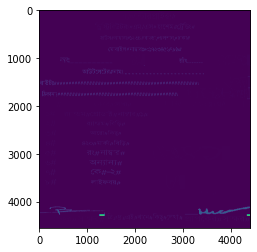

(4550, 4418)


In [6]:
## merge re_full_memoHead_img, full_memoTable_img, full_memoBottom_img
memo_merge=np.concatenate([re_full_memoHead_img, re_full_memoTable_img, re_full_memoBottom_img],axis=0)
plt.imshow(memo_merge)
plt.show()

print(memo_merge.shape)

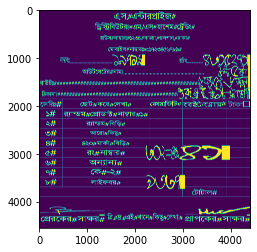

(4550, 4418)


In [7]:
### Clean view
memo_merge[memo_merge>0]=255
plt.imshow(memo_merge)
plt.show()

print(memo_merge.shape)

In [8]:
cv2.imwrite("../synthdata/memo.png", memo_merge)

True